## A Demo on P-Sonic Log Prediction using Machine Learning in the Volve Field Dataset

See the complete notebook [here](https://github.com/yohanesnuwara/volve-machine-learning/blob/main/notebook/volve_p_sonic_prediction_final.ipynb). In this shortened workflow, it assumes that we have previously done data prepro.

https://yohanesnuwara.github.io/talks/

https://yohanesnuwara.github.io/talks/2020-10-29-alexandriaml

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
#!pip install lasio
import lasio

In [2]:
# !git clone https://github.com/yohanesnuwara/volve-machine-learning

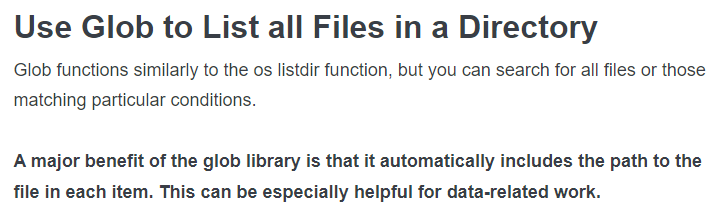

In [15]:
import glob
import os

paths = sorted(glob.glob(os.path.join("C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs", "*.LAS")))
paths

['C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-11A.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-11B.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1A.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1B.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1C.LAS']

In [24]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs", "*.LAS")))

well_df = [0] * 5

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()


#well_df
well1, well2, well3, well4, well5 = well_df


In [25]:
well5

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39476,4093.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8147,NaN,NaN,NaN
39477,4093.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8163,NaN,NaN,NaN
39478,4093.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8179,NaN,NaN,NaN
39479,4093.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


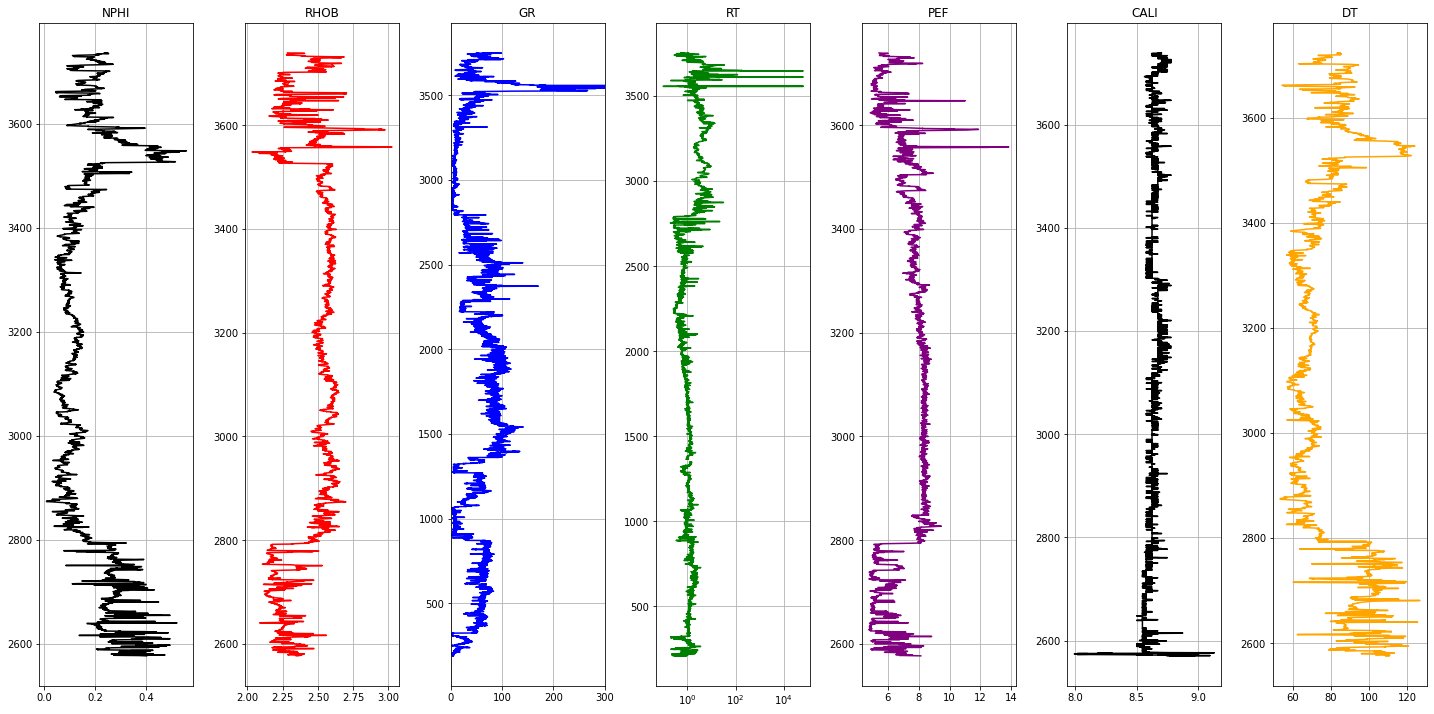

In [32]:
# display
# wels 1,3,4 - train data;  welss 2,5 - test data

# for predictions, all the wells have to have the same amount of curve-logs
well = well1

# define logs to be used
logs=['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
colors=["black","red","blue","green","purple","black", "orange"]
fig, ax=plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

for i in range(len(logs)):
    if i==3:
        # for resistivity, semilog plot
        ax[i].semilogx(well[logs[i]], well["DEPTH"], color=colors[i])
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well["DEPTH"], color=colors[i])
    ax[i].set_title(logs[i])
    ax[i].grid(True)

ax[2].set_xlim(0,300)
plt.tight_layout(1,1)  # so that the y-axis values do not overlap between plots
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


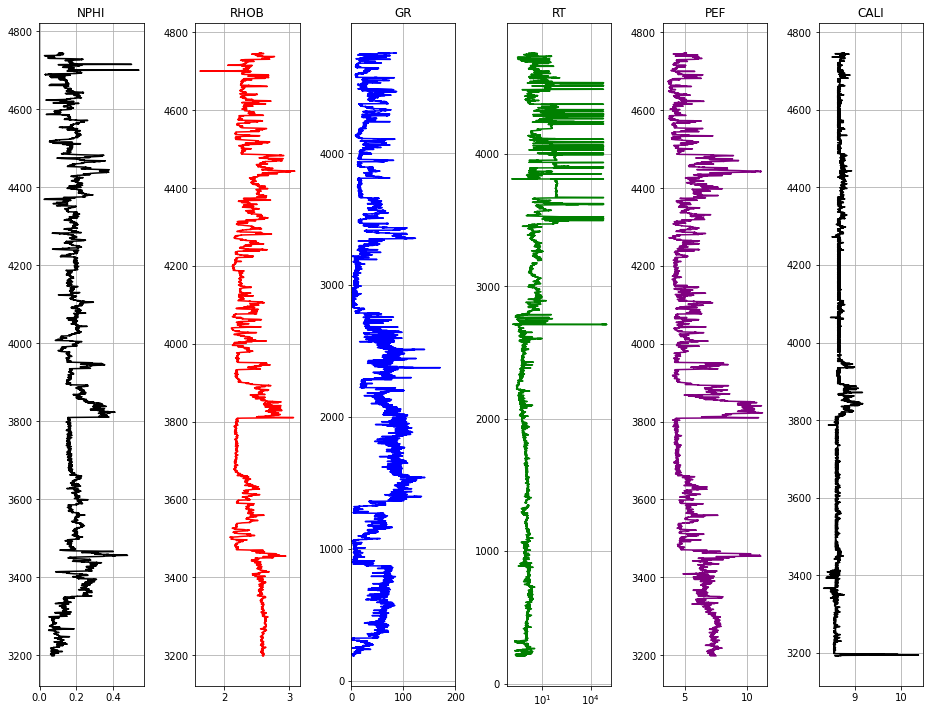

In [33]:
# display
# wels 1,3,4 - train data;  welss 2,5 - test data

well = well2

# define logs to be used
logs=['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' ]
colors=["black","red","blue","green","purple","black"]
fig, ax=plt.subplots(nrows=1, ncols=len(logs), figsize=(13,10))

for i in range(len(logs)):
    if i==3:
        # for resistivity, semilog plot
        ax[i].semilogx(well[logs[i]], well["DEPTH"], color=colors[i])
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well["DEPTH"], color=colors[i])
    ax[i].set_title(logs[i])
    ax[i].grid(True)

ax[2].set_xlim(0,200)
plt.tight_layout(1,1)  # so that the y-axis values do not overlap between plots
plt.show()

# Data preparation
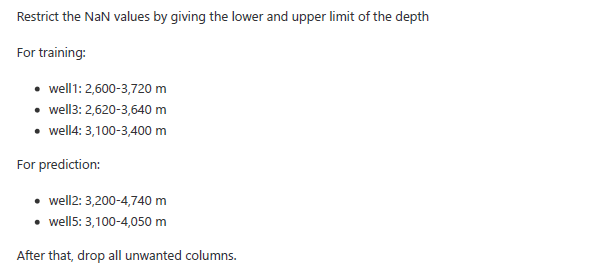

In [34]:
well5

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39476,4093.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8147,NaN,NaN,NaN
39477,4093.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8163,NaN,NaN,NaN
39478,4093.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8179,NaN,NaN,NaN
39479,4093.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# lower limits
low=[2600,3200,2620,3100,3100]
# upper limits
up=[3720,4740,3640,3400,4050]
# columns to use for training
train_cols = ['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
# columns to use for test
test_cols = ['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
# train/test wells
train_wells=[1,3,4]
test_wells=[2,5]

well_df_restrict=[0]*5

for i in range(len(well_df)):
    # restrict depth by the low/up limis
    low_restrict=well_df[i]['DEPTH']>=low[i]
    up_restrict=well_df[i]['DEPTH']<=up[i]
    df=well_df[i].loc[low_restrict & up_restrict]
    
    if i+1 in train_wells:
        well_df_restrict[i]=df[train_cols]  # drop unwanted columns
    else:
        well_df_restrict[i]=df[test_cols]  # drop unwanted columns
        
well1, well2, well3, well4, well5=well_df_restrict

well5



,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
29541,3100.0,0.1378,2.5729,33.1264,3.0503,7.9837,8.5243
29542,3100.1,0.1368,2.5696,32.5644,3.0585,7.9401,8.5243
29543,3100.2,0.1351,2.5670,32.3169,3.0454,7.9126,8.5243
29544,3100.3,0.1341,2.5668,32.9734,3.0365,7.9216,8.5243
29545,3100.4,0.1349,2.5690,33.0557,3.0844,7.9582,8.5243
...,...,...,...,...,...,...,...
39037,4049.6,0.3107,2.4184,106.7613,2.6950,6.2332,8.5569
39038,4049.7,0.2997,2.4186,109.0336,2.6197,6.2539,8.5569
39039,4049.8,0.2930,2.4232,106.0935,2.5948,6.2883,8.5570
39040,4049.9,0.2892,2.4285,105.4931,2.6344,6.3400,8.6056


In [40]:
well1.isnull().sum()  # check for nan

DEPTH    0
NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
DT       0
dtype: int64

In [ ]:
# merge datasets in two single dataframes for training and test. Then assign well names
# for the sake of next workflows, the unwanted column location must be changed to the right.